# Pandas

#### Importando a biblioteca

In [1]:
import pandas as pd

#### Criação e importação de novos dados

In [2]:
lista_de_dic = [{"var1": 2, "var2": 3},{"var1": 4, "var2": 5}]
lista_de_dic

[{'var1': 2, 'var2': 3}, {'var1': 4, 'var2': 5}]

In [3]:
dic_de_listas = {"var1": [1, 2],
                 "var2": ["3", "4"]}
dic_de_listas

{'var1': [1, 2], 'var2': ['3', '4']}

In [4]:
df1 = pd.DataFrame(lista_de_dic)
df1

,var1,var2
0,2,3
1,4,5


In [5]:
df2 = pd.DataFrame(dic_de_listas)
df2 

,var1,var2
0,1,3
1,2,4


##### Função para importar banco de dados

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv", sep = ",")

#### Funções Básicas

##### Funções para conferência inicial dos dados

In [8]:
df.head() # primeiras linhas do data-frame;

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
df.info() # Informações de cada coluna, como tipo das variáveis e número de valores faltantes;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
df.shape # Mostra as dimensões do data-frame;

(144, 2)

In [11]:
df.describe() # Mostra algumas estatísticas sobre o banco de dados;

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [12]:
df.columns # Mostra o nome das colunas do banco de dados;

Index(['Month', 'Passengers'], dtype='object')

In [13]:
df.isnull().sum() # número de nulos em cada coluna;

Month         0
Passengers    0
dtype: int64

In [14]:
df['Passengers'].fillna(df['Passengers'].median()) # Caso ouvessem NAs, seria possível preenchê-los com outro valor;

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64

##### Funções para ordenar valores

In [15]:
df.sort_values("Passengers") # Ordena o banco de dados segundo a variável indicada;

,Month,Passengers
10,1949-11,104
0,1949-01,112
22,1950-11,114
12,1950-01,115
1,1949-02,118
...,...,...
137,1960-06,535
126,1959-07,548
127,1959-08,559
139,1960-08,606


In [16]:
df.sort_values("Passengers", ascending = False) # em ordem Decrescente;

,Month,Passengers
138,1960-07,622
139,1960-08,606
127,1959-08,559
126,1959-07,548
137,1960-06,535
...,...,...
11,1949-12,118
12,1950-01,115
22,1950-11,114
0,1949-01,112


In [17]:
df.sort_values(["Passengers", "Month"]) # Ordenando segundo duas variáveis;

,Month,Passengers
10,1949-11,104
0,1949-01,112
22,1950-11,114
12,1950-01,115
1,1949-02,118
...,...,...
137,1960-06,535
126,1959-07,548
127,1959-08,559
139,1960-08,606


In [18]:
df.sort_values(["Month", "Passengers"], ascending = [False, True]) 

,Month,Passengers
143,1960-12,432
142,1960-11,390
141,1960-10,461
140,1960-09,508
139,1960-08,606
...,...,...
4,1949-05,121
3,1949-04,129
2,1949-03,132
1,1949-02,118


##### Funções para seleção de colunas e linhas



In [19]:
df["Passengers"] # Mostrar valores de uma única coluna;

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64

In [20]:
df[["Passengers", "Month"]] # Para mostrar valores de mais de uma coluna é necessário utilizar uma lista;

,Passengers,Month
0,112,1949-01
1,118,1949-02
2,132,1949-03
3,129,1949-04
4,121,1949-05
...,...,...
139,606,1960-08
140,508,1960-09
141,461,1960-10
142,390,1960-11


In [21]:
df[df["Passengers"] > 200] # Imprime apenas as linhas cujo valor da variável é maior que um valor definido;

,Month,Passengers
41,1952-06,218
42,1952-07,230
43,1952-08,242
44,1952-09,209
50,1953-03,236
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [22]:
df[(df["Passengers"] > 200) & (df["Month"] < "1960-08")]

,Month,Passengers
41,1952-06,218
42,1952-07,230
43,1952-08,242
44,1952-09,209
50,1953-03,236
...,...,...
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535


In [23]:
df["Passengers"].isin(range(300, 500)) # Retorna um vetor lógico;

0      False
1      False
2      False
3      False
4      False
       ...  
139    False
140    False
141     True
142     True
143     True
Name: Passengers, Length: 144, dtype: bool

In [24]:
df.loc[[1, 2]] # Vai imprimir apenas as linhas com os index "nome1" e "nome2";

,Month,Passengers
1,1949-02,118
2,1949-03,132


In [ ]:
# df.drop_duplicates(subset = "variável") # Exclui as linhas com valores duplicados da variável
# df.drop_duplicates(subset = ["variável1", "variável2"])

In [25]:
df["Month"].replace('-', '/', regex = True) # Trocar um padrão de caracteres por um padrão desejado em toa coluna 

0      1949/01
1      1949/02
2      1949/03
3      1949/04
4      1949/05
        ...   
139    1960/08
140    1960/09
141    1960/10
142    1960/11
143    1960/12
Name: Month, Length: 144, dtype: object

##### Funções para fazer descritivas

In [26]:
df["Passengers"].mean() # Calcula a média dos valores de uma coluna;

280.2986111111111

In [27]:
df["Passengers"].median() # Calcula a mediana;

265.5

In [28]:
df["Passengers"].mode() # Calcula a moda;

0    229
dtype: int64

In [29]:
df["Passengers"].min() # Mostra o valor mínimo;

104

In [30]:
df["Passengers"].max() # Mostra o valor máximo;

622

In [31]:
df["Passengers"].var() # Calcula a variância (não sei se é a populacional);

14391.917200854701

In [32]:
df["Passengers"].std() # Calcula o desvio padrão;

119.96631694294321

In [33]:
df["Passengers"].quantile(0.25) # Calcula o percentil-p;

180.0

In [34]:
df.corr() # matriz de correlação para entre todas as variáveis;

,Passengers
Passengers,1.0


In [35]:
df["Passengers"].agg([max, sum]) # Agrupa o resultado de duas funções;

max      622
sum    40363
Name: Passengers, dtype: int64

In [36]:
df["Passengers"].cumsum() # Retorna uma coluna acumulada, isto é, os valores anteriores vão se somando ao próximo;

0        112
1        230
2        362
3        491
4        612
       ...  
139    38572
140    39080
141    39541
142    39931
143    40363
Name: Passengers, Length: 144, dtype: int64

##### Funções para criar novos atributos

In [37]:
df["id"] = range(1, df.shape[0] + 1) # Acrescentar uma nova variável ao bando de dados;
df["acumulado"] = df["Passengers"].cumsum() # Nova variável a partir de função;
df['year'] = pd. DatetimeIndex(df['Month']). year  # Extraindo mês e ano das datas;
df['month'] = pd. DatetimeIndex(df['Month']). month
df.head()

,Month,Passengers,id,acumulado,year,month
0,1949-01,112,1,112,1949,1
1,1949-02,118,2,230,1949,2
2,1949-03,132,3,362,1949,3
3,1949-04,129,4,491,1949,4
4,1949-05,121,5,612,1949,5


In [38]:
df["year"].value_counts() # Conta os valores que cada categoria aparece;

1949    12
1950    12
1951    12
1952    12
1953    12
1954    12
1955    12
1956    12
1957    12
1958    12
1959    12
1960    12
Name: year, dtype: int64

In [39]:
df["year"].value_counts(sort = True) # Ordenando a contagem

1949    12
1950    12
1951    12
1952    12
1953    12
1954    12
1955    12
1956    12
1957    12
1958    12
1959    12
1960    12
Name: year, dtype: int64

In [40]:
df["year"].value_counts(normalize = True) # Deixa em proporção a contagem;

1949    0.083333
1950    0.083333
1951    0.083333
1952    0.083333
1953    0.083333
1954    0.083333
1955    0.083333
1956    0.083333
1957    0.083333
1958    0.083333
1959    0.083333
1960    0.083333
Name: year, dtype: float64

In [41]:
df.groupby("month")["Passengers"].mean() # Retorna a média da variável para cada categória;

month
1     241.750000
2     235.000000
3     270.166667
4     267.083333
5     271.833333
6     311.666667
7     351.333333
8     351.083333
9     302.416667
10    266.583333
11    232.833333
12    261.833333
Name: Passengers, dtype: float64

In [42]:
df.groupby("month")["Passengers"].agg([max, sum]) # Faz uma tabela com as medidas desejadas;

,max,sum
month,,
1,417,2901
2,391,2820
3,419,3242
4,461,3205
5,472,3262
6,535,3740
7,622,4216
8,606,4213
9,508,3629


In [ ]:
# df.groupby(["categórica1", "categórica2"])[["variável1", "variáve2"]] # é possível agrupar com duas variáveis

In [43]:
df.set_index("id") # Define uma varável como o Index do banco de dados;

,Month,Passengers,acumulado,year,month
id,,,,,
1,1949-01,112,112,1949,1
2,1949-02,118,230,1949,2
3,1949-03,132,362,1949,3
4,1949-04,129,491,1949,4
5,1949-05,121,612,1949,5
...,...,...,...,...,...
140,1960-08,606,38572,1960,8
141,1960-09,508,39080,1960,9
142,1960-10,461,39541,1960,10


In [44]:
df.set_index(["id", "Month"]) # Dá pra colocar mais de um index;

,,Passengers,acumulado,year,month
id,Month,,,,
1,1949-01,112,112,1949,1
2,1949-02,118,230,1949,2
3,1949-03,132,362,1949,3
4,1949-04,129,491,1949,4
5,1949-05,121,612,1949,5
...,...,...,...,...,...
140,1960-08,606,38572,1960,8
141,1960-09,508,39080,1960,9
142,1960-10,461,39541,1960,10


In [45]:
df.reset_index() # Retira o index (o argumento drop igualado a True também exclui a variável);

,index,Month,Passengers,id,acumulado,year,month
0,0,1949-01,112,1,112,1949,1
1,1,1949-02,118,2,230,1949,2
2,2,1949-03,132,3,362,1949,3
3,3,1949-04,129,4,491,1949,4
4,4,1949-05,121,5,612,1949,5
...,...,...,...,...,...,...,...
139,139,1960-08,606,140,38572,1960,8
140,140,1960-09,508,141,39080,1960,9
141,141,1960-10,461,142,39541,1960,10
142,142,1960-11,390,143,39931,1960,11


In [46]:
pd.get_dummies(df["month"], prefix="Month") # Criação de one hot enconding para uma variável;

,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
139,0,0,0,0,0,0,0,1,0,0,0,0
140,0,0,0,0,0,0,0,0,1,0,0,0
141,0,0,0,0,0,0,0,0,0,1,0,0
142,0,0,0,0,0,0,0,0,0,0,1,0


In [47]:
pd.get_dummies(df["month"], prefix="Month", drop_first = True)

,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
139,0,0,0,0,0,0,1,0,0,0,0
140,0,0,0,0,0,0,0,1,0,0,0
141,0,0,0,0,0,0,0,0,1,0,0
142,0,0,0,0,0,0,0,0,0,1,0


In [48]:
df.pivot_table(values = "Passengers", index = "month", aggfunc = max) # Tabela de Resumos;

,Passengers
month,
1,417
2,391
3,419
4,461
5,472
6,535
7,622
8,606
9,508


In [49]:
df.pivot_table(values = "Passengers", index = "year", aggfunc = max, columns = "month")

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [50]:
df.pivot_table(values = "Passengers", index = "year", aggfunc = max, columns = "month", margins = True) # Para dar a proporção por linha;

month,1,2,3,4,5,6,7,8,9,10,11,12,All
year,,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118,148
1950,115,126,141,135,125,149,170,170,158,133,114,140,170
1951,145,150,178,163,172,178,199,199,184,162,146,166,199
1952,171,180,193,181,183,218,230,242,209,191,172,194,242
1953,196,196,236,235,229,243,264,272,237,211,180,201,272
1954,204,188,235,227,234,264,302,293,259,229,203,229,302
1955,242,233,267,269,270,315,364,347,312,274,237,278,364
1956,284,277,317,313,318,374,413,405,355,306,271,306,413
1957,315,301,356,348,355,422,465,467,404,347,305,336,467


In [51]:
df.pivot_table(values = "Passengers", index = "year", aggfunc = max, columns = "month", fill_value = 0) # No lugar dos NaN aparecerá zero;

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [53]:
# Tabela de frequências cruzada
pd.crosstab(df["year"], df["month"], dropna=False)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1949,1,1,1,1,1,1,1,1,1,1,1,1
1950,1,1,1,1,1,1,1,1,1,1,1,1
1951,1,1,1,1,1,1,1,1,1,1,1,1
1952,1,1,1,1,1,1,1,1,1,1,1,1
1953,1,1,1,1,1,1,1,1,1,1,1,1
1954,1,1,1,1,1,1,1,1,1,1,1,1
1955,1,1,1,1,1,1,1,1,1,1,1,1
1956,1,1,1,1,1,1,1,1,1,1,1,1
1957,1,1,1,1,1,1,1,1,1,1,1,1


In [56]:
# Concatenando dataframes como RBind
concat0 = pd.concat([df, df])
concat0

,Month,Passengers,id,acumulado,year,month
0,1949-01,112,1,112,1949,1
1,1949-02,118,2,230,1949,2
2,1949-03,132,3,362,1949,3
3,1949-04,129,4,491,1949,4
4,1949-05,121,5,612,1949,5
...,...,...,...,...,...,...
139,1960-08,606,140,38572,1960,8
140,1960-09,508,141,39080,1960,9
141,1960-10,461,142,39541,1960,10
142,1960-11,390,143,39931,1960,11


In [57]:
# Concatenando dataframes como CBind
concat1 = pd.concat([df, df], axis = 1)
concat1

,Month,Passengers,id,acumulado,year,month,Month,Passengers,id,acumulado,year,month
0,1949-01,112,1,112,1949,1,1949-01,112,1,112,1949,1
1,1949-02,118,2,230,1949,2,1949-02,118,2,230,1949,2
2,1949-03,132,3,362,1949,3,1949-03,132,3,362,1949,3
3,1949-04,129,4,491,1949,4,1949-04,129,4,491,1949,4
4,1949-05,121,5,612,1949,5,1949-05,121,5,612,1949,5
...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08,606,140,38572,1960,8,1960-08,606,140,38572,1960,8
140,1960-09,508,141,39080,1960,9,1960-09,508,141,39080,1960,9
141,1960-10,461,142,39541,1960,10,1960-10,461,142,39541,1960,10
142,1960-11,390,143,39931,1960,11,1960-11,390,143,39931,1960,11


In [58]:
# Equivalente ao pivot_longer
pd.melt(df, id_vars=['id'])

,id,variable,value
0,1,Month,1949-01
1,2,Month,1949-02
2,3,Month,1949-03
3,4,Month,1949-04
4,5,Month,1949-05
...,...,...,...
715,140,month,8
716,141,month,9
717,142,month,10
718,143,month,11


In [61]:
# Equivalente ao pivot_longer
pd.melt(df, id_vars=['id'], value_vars=['Passengers', 'acumulado'])

,id,variable,value
0,1,Passengers,112
1,2,Passengers,118
2,3,Passengers,132
3,4,Passengers,129
4,5,Passengers,121
...,...,...,...
283,140,acumulado,38572
284,141,acumulado,39080
285,142,acumulado,39541
286,143,acumulado,39931


#### Criar gráficos

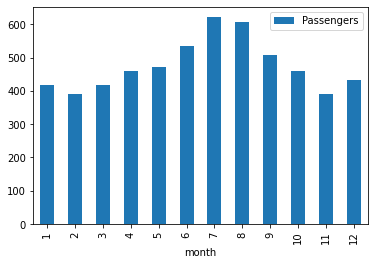

In [77]:
df_max = df.pivot_table(values = "Passengers", index = "month", aggfunc = max)
df_max.plot(kind = "bar") # Faz um gráfico de barras, mas o data.frame já tem que ser Tabela de frequência;

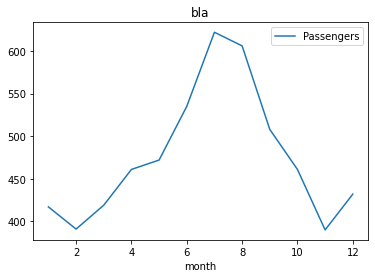

In [78]:
df_max.plot(kind = "line", title = "bla") # Faz um gráfico de linhas, mas o df tem que ter só duas colunas também;

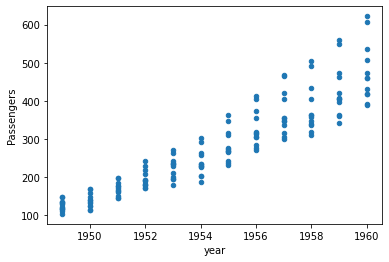

In [79]:
df.plot(x = "year", y = "Passengers", kind = "scatter") # Também dá pra especificar as variáveis